In [1]:
import seaborn as sns

In [56]:
import pandas as pd

train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

In [41]:
train_data.head()

,Id,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0,8.0,0.50,0.39,2.2,0.073,30.0,39.0,0.99572,3.33,0.77,12.1,6
1,1,9.3,0.30,0.73,2.3,0.092,30.0,67.0,0.99854,3.32,0.67,12.8,6
2,2,7.1,0.51,0.03,2.1,0.059,3.0,12.0,0.99660,3.52,0.73,11.3,7
3,3,8.1,0.87,0.22,2.6,0.084,11.0,65.0,0.99730,3.20,0.53,9.8,5
4,4,8.5,0.36,0.30,2.3,0.079,10.0,45.0,0.99444,3.20,1.36,9.5,6


In [57]:
y = train_data['quality']
x = train_data.drop(['quality','Id'], axis=1)
x_test = test_data.drop('Id', axis=1)

In [58]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(sparse_output=False)
y = pd.DataFrame(ohe.fit_transform(y.values.reshape(-1,1)))
y.index = train_data.index

In [31]:
ohe.categories_

[array([3, 4, 5, 6, 7, 8], dtype=int64)]

In [46]:
y.shape

(2056, 6)

In [59]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
x_test = pd.DataFrame(scaler.transform(x_test), columns=x_test.columns)

In [60]:
from sklearn.model_selection import train_test_split

x_train, x_val, y_train, y_val = train_test_split(x,y,test_size=0.1,random_state=42)

In [62]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(units=11, activation='relu', input_shape=[11]),
    layers.Dense(units=66, activation='relu'),
    layers.Dense(units=6, activation='softmax')
])

In [63]:
model.compile(optimizer='Adam', loss="categorical_crossentropy", metrics=["accuracy"])

In [64]:
early_stopping = keras.callbacks.EarlyStopping(patience=5, min_delta=0.001, restore_best_weights=True)

In [65]:
history = model.fit(
    x_train,y_train,
    validation_data=(x_val,y_val),
    epochs=200,
    batch_size=200,
    callbacks=early_stopping
)

Epoch 1/200
10/10 [==============================] - 2s 51ms/step - loss: 1.7471 - accuracy: 0.3627 - val_loss: 1.6981 - val_accuracy: 0.3786
Epoch 2/200
10/10 [==============================] - 0s 10ms/step - loss: 1.6641 - accuracy: 0.3784 - val_loss: 1.6160 - val_accuracy: 0.3786
Epoch 3/200
10/10 [==============================] - 0s 7ms/step - loss: 1.5782 - accuracy: 0.3784 - val_loss: 1.5285 - val_accuracy: 0.3835
Epoch 4/200
10/10 [==============================] - 0s 9ms/step - loss: 1.4861 - accuracy: 0.3897 - val_loss: 1.4360 - val_accuracy: 0.4320
Epoch 5/200
10/10 [==============================] - 0s 9ms/step - loss: 1.3927 - accuracy: 0.4319 - val_loss: 1.3504 - val_accuracy: 0.4757
Epoch 6/200
10/10 [==============================] - 0s 8ms/step - loss: 1.3131 - accuracy: 0.5097 - val_loss: 1.2848 - val_accuracy: 0.5049
Epoch 7/200
10/10 [==============================] - 0s 8ms/step - loss: 1.2570 - accuracy: 0.5411 - val_loss: 1.2447 - val_accuracy: 0.5146
Epoch 8/200

In [66]:
result = model.predict(x_test)

43/43 [==============================] - 0s 1ms/step


<AxesSubplot: ylabel='Count'>

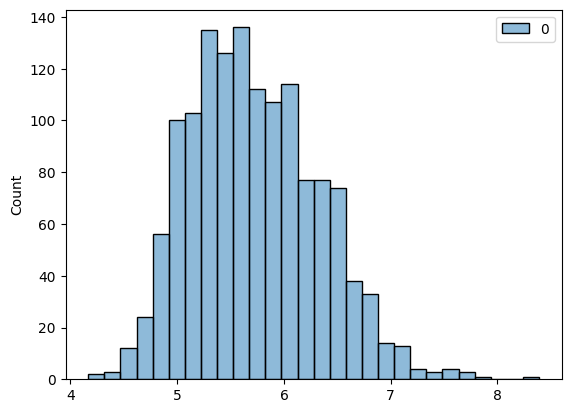

In [30]:
sns.histplot(result)

In [67]:
new_result = []
for row in result:
    new_result.append(list(row).index(max(row))+3)

<AxesSubplot: ylabel='Count'>

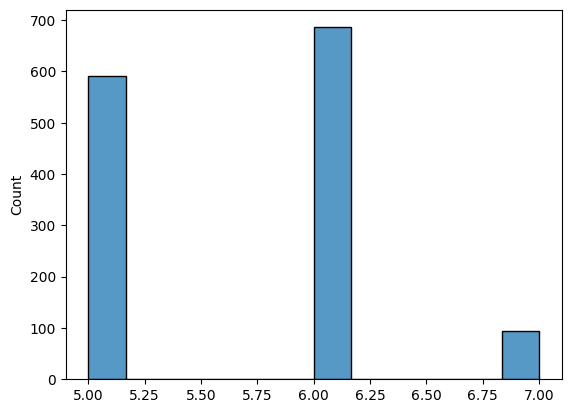

In [68]:
sns.histplot(new_result)

In [33]:
df = pd.DataFrame({'Id':test_data['Id'].values, 'quality':new_result})
df.to_csv('submission.csv', index=False)